# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
!pip install citipy

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [57]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | skelleftea
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | boras
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | leshukonskoye
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bembibre
City not found. Skipping...
Processing Record 11 of Set 1 | chernyshevskiy
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | eureka
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | cape town
City not found. Skipping...
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
# create a data frame from retreived weather data
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Skellefteå,86,SE,1588895335,92,64.75,20.95,0.00,2.10
1,San Patricio,5,MX,1588895335,83,19.22,-104.70,28.00,2.60
2,Cabo San Lucas,5,MX,1588895113,11,22.89,-109.91,38.00,8.70
3,Borås,90,SE,1588895335,81,57.72,12.94,6.67,3.60
4,Mataura,81,NZ,1588895336,77,-46.19,168.86,11.26,2.36


In [62]:
#Export the city data into a .csv.
weather_raw.to_csv("weather_by_city.csv")
weather_raw.count()

City Name              580
Cloud                  580
Country                580
Date                   580
Humidity               580
Latitude               580
Longitude              580
Maximum Temperature    580
Wind Speed             580
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

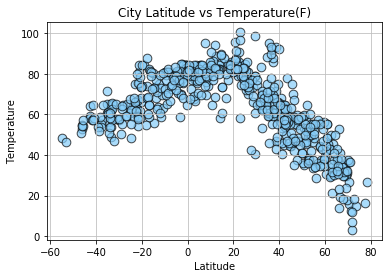

In [73]:
plt.figure(figsize = (6, 4))
plt.scatter(weather_raw['Latitude'], weather_raw['Maximum Temperature'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

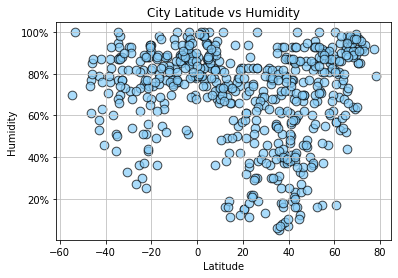

In [74]:

#build a scatter plot based on the columns Latitude and humidity
plt.figure(figsize = (6,4))
plt.scatter(weather_raw['Latitude'], weather_raw['Humidity'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

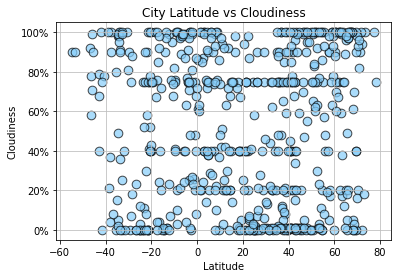

In [75]:

#build a scatter plot based on the columns Latitude and cloudiness
plt.figure(figsize = (6, 4))
plt.scatter(weather_raw['Latitude'], weather_raw['Cloud'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

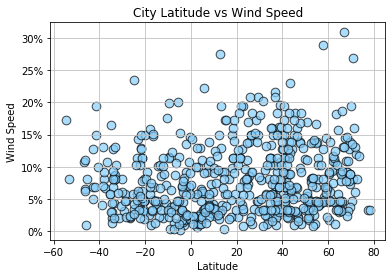

In [76]:
#build a scatter plot based on the columns Latitude and wind speed
plt.figure(figsize = (6, 4))
plt.scatter(weather_raw['Latitude'], weather_raw['Wind Speed'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()